In [37]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
from scipy.optimize import curve_fit

In [138]:
i=np.arange(0,10)
k=np.arange(10,63)
k

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62])

In [114]:
frecuencia=[1,
2,
4,
6,
8,
10,
15,
20,
50,
100,
200,
300,
500,
800,
1000,
2000,
3000,
5000,
8000,
10000,
10000,
11000,
13000,
15000,
18000,
20000,
30000,
50000,
80000,
100000,
200000,
300000,
500000,
800000,
1000000,
900000,
1100000,
1200000,
1300000,
1400000,
1500000,
1600000,
1700000,
1800000,
1900000,
2000000,
2100000,
2200000,
2300000,
2400000,
2500000,
2800000,
3000000,
3500000,
4000000,
4500000,
5000000,
6000000,
7000000,
8000000,
9000000,
10000000,
20000000]

In [139]:
seno=[]
for j in i:
    seno.append(np.genfromtxt('/home/josefina/Desktop/Datos0/ALL000{}/F000{}CH1.CSV'.format(j,j), delimiter=',',usecols = (3, 4)))
for j in k:
    seno.append(np.genfromtxt('/home/josefina/Desktop/Datos0/ALL00{}/F00{}CH1.CSV'.format(j,j), delimiter=',',usecols = (3, 4)))

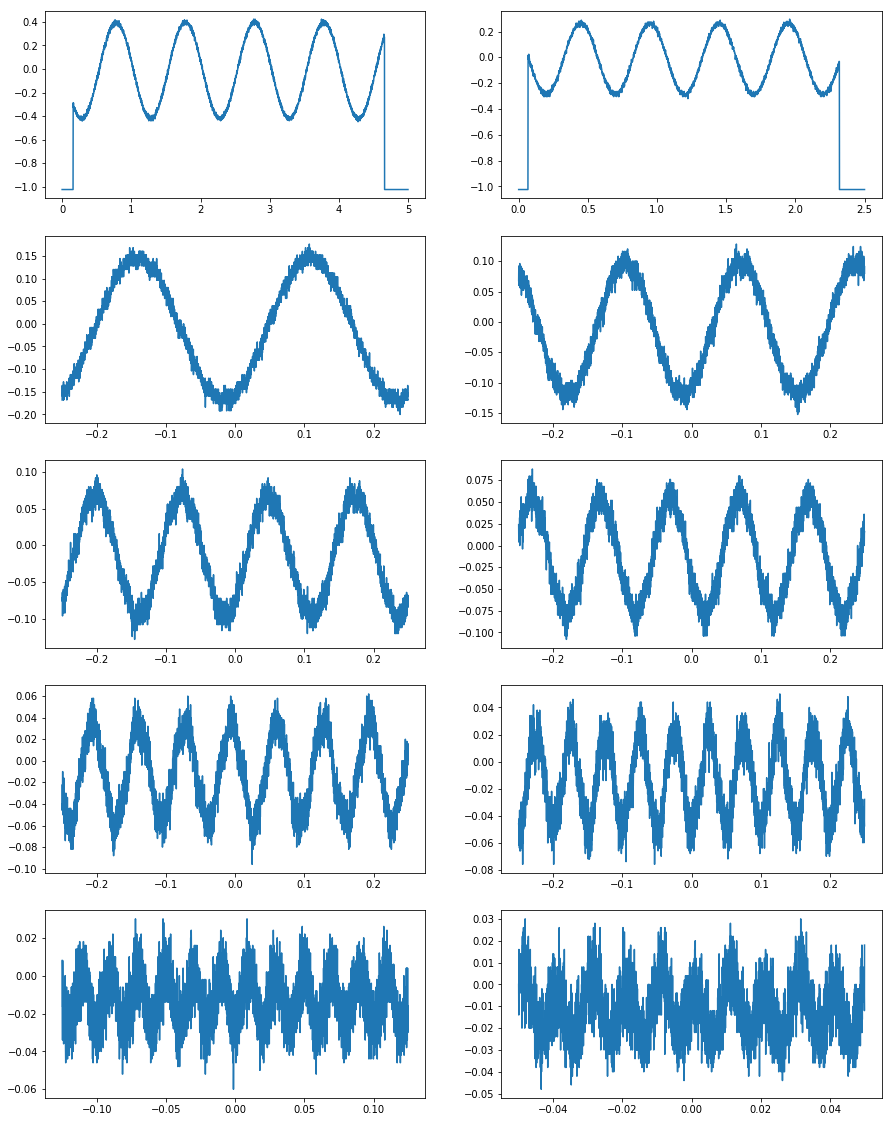

In [36]:
plt.figure(figsize=(15,20))
for j in i:
    plt.subplot(5,2,j+1)
    plt.plot(datos[j][:,0],datos[j][:,1])

In [50]:
f_sin = lambda x, A, B, C, D: A * np.sin(B*x+C)+D

# Ajustamos, pero con las funciónes logaritmicas. Usamos propagación de errores
def ajusteseno(datos,po):
    popt_sin, pcov_sin = curve_fit(f_sin, datos[:,0], datos[:,1], sigma = 0.005*np.ones(len(datos[:,1])), absolute_sigma=True,p0=po) #po mi parametros iniciales que a ojo yo veo que son. por default son 1.
    return(popt_sin, pcov_sin)

In [140]:
seno[0]=seno[0][100:2300,:]
seno[1]=seno[1][100:2300,:]


In [119]:
popt_sin, pcov_sin=ajusteseno(seno[30],po=[0.4,2*np.pi*frecuencia[30],0.04,0])
popt_sin

array([ 2.87709707e-01,  1.25616792e+06,  2.35288907e-01, -1.22889695e-02])

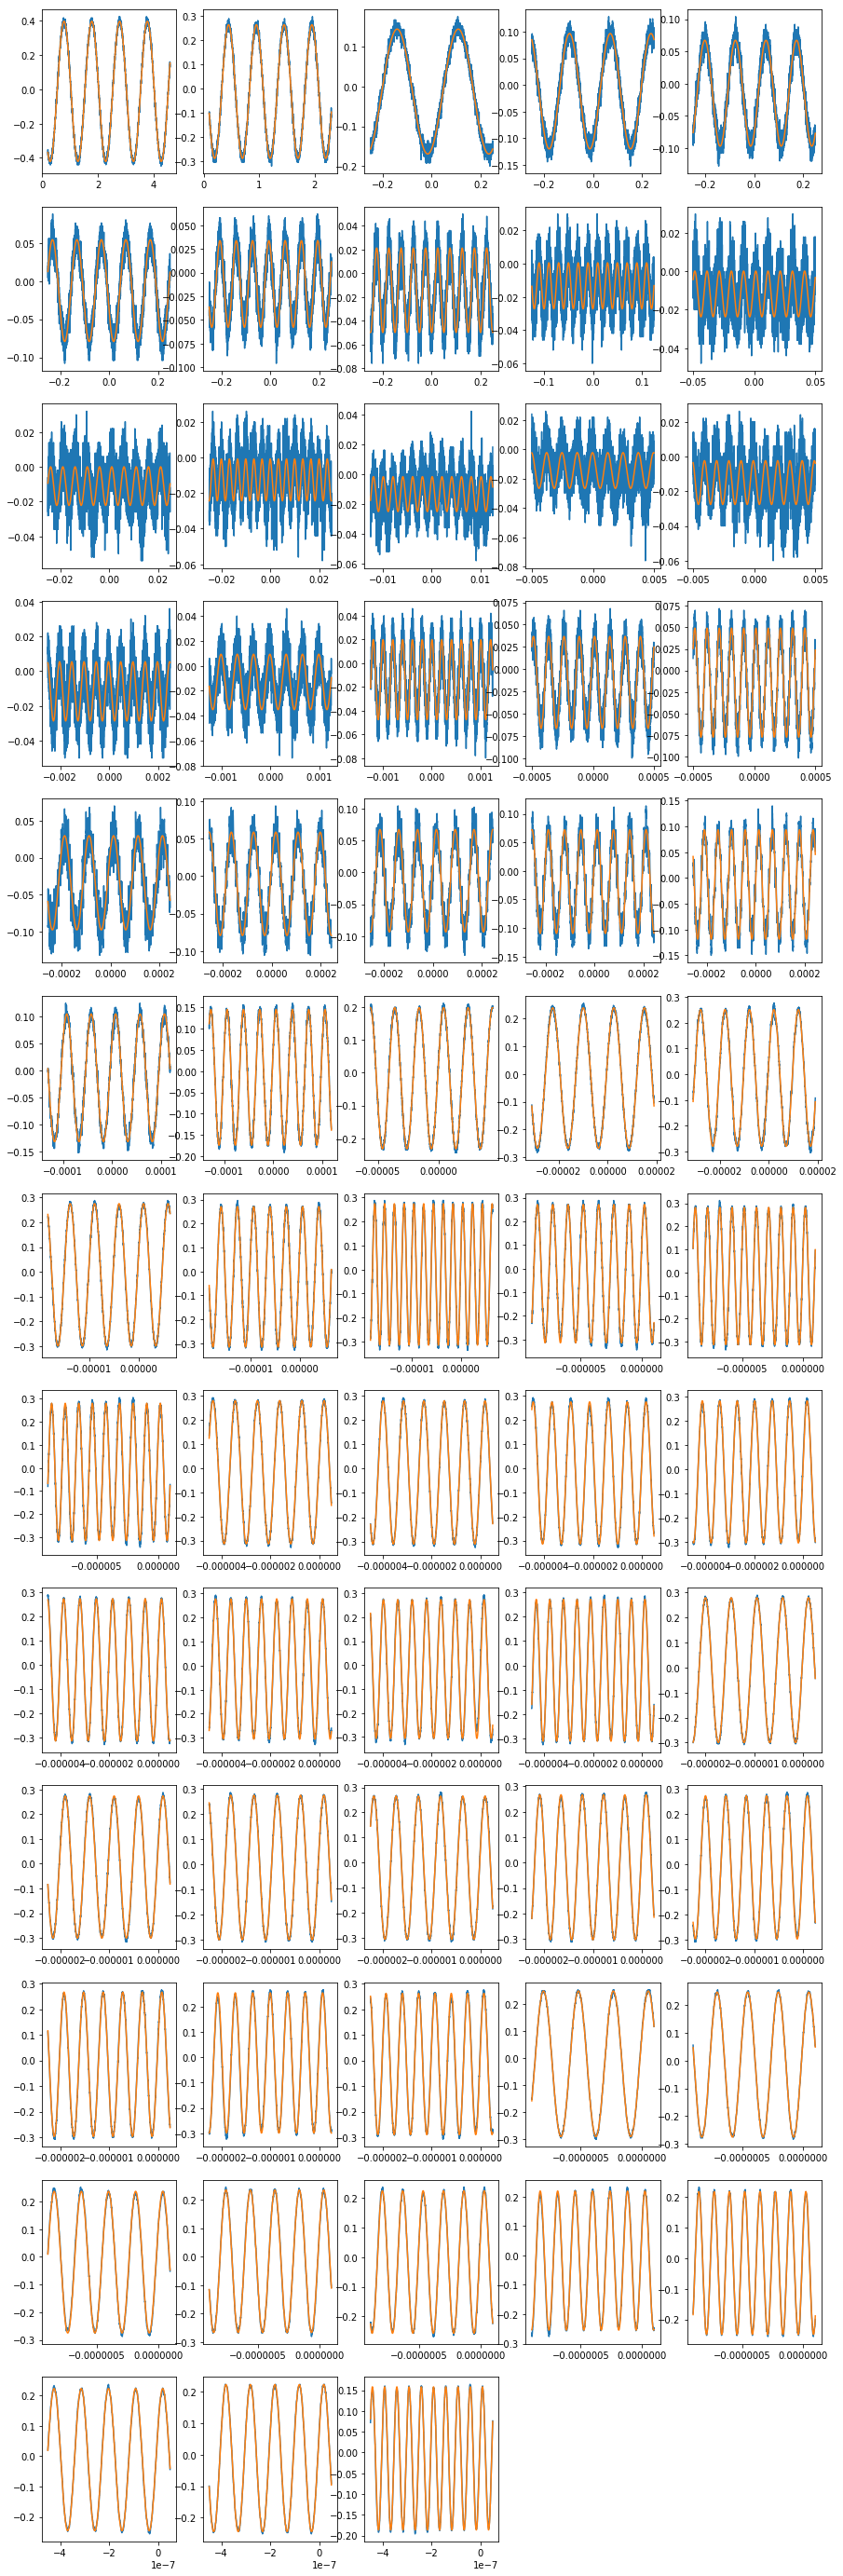

In [142]:
l=np.arange(0,63)
A=[]
plt.figure(figsize=(15,50))
for j in l:
    popt_sin, pcov_sin=ajusteseno(seno[j],po=[0.2,2*np.pi*frecuencia[j],0.04,0])
    A.append(popt_sin[0])
    plt.subplot(13,5,j+1)
    plt.plot(seno[j][:,0],seno[j][:,1])
    plt.plot(seno[j][:,0],popt_sin[0] * np.sin(popt_sin[1]*seno[j][:,0]+popt_sin[2])+popt_sin[3])

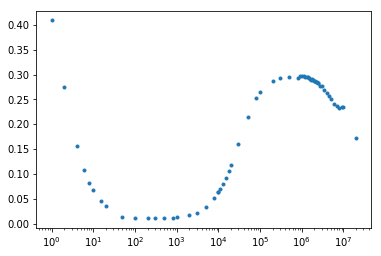

In [147]:
plt.semilogx(frecuencia,np.abs(A),'.')